# Import bibliotek

In [154]:
import os
import shutil
import librosa
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display as ipd
import tensorflow as tf

In [89]:
RAW_DATA_PATH = "./Respiratory_Sound_Database/Respiratory_Sound_Database"

# Wczytanie danych o chorobach pacjentów

In [90]:
patient_diseases_info = pd.read_csv(f'{RAW_DATA_PATH}/patient_diagnosis.csv')
patient_diseases_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   PatientID  126 non-null    int64 
 1   Diagnosis  126 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.1+ KB


In [99]:
unique_diseases = patient_diseases_info['Diagnosis'].unique()
unique_diseases = sorted(unique_diseases)
print(f'Unikalne nazwy chorób płucnych: {unique_diseases}')

Unikalne nazwy chorób płucnych: ['Asthma', 'Bronchiectasis', 'Bronchiolitis', 'COPD', 'Healthy', 'LRTI', 'Pneumonia', 'URTI']


# Segregacja plików audio ze względu na choroby 

In [93]:
#Tworzenie głównego folderu z danymi
if not os.path.exists('./data'):
    print("TWORZENIE KATALOGU GŁÓWNEGO")
    os.mkdir("./data")

#Tworzenie folderu dla audio
if not os.path.exists('./data/audio'):
    print("TWORZENIE KATALOGU DLA AUDIO")
    os.mkdir("./data/audio")

#Tworzenie podfolderów audio
for diseas in unique_diseases:
    if not os.path.exists(f"./data/audio/{diseas}"):
        print(f"TWORZENIE PODKATALOGU DLA AUDIO CHOROB : {diseas}")
        os.mkdir(f"./data/audio/{diseas}")


TWORZENIE KATALOGU GŁÓWNEGO
TWORZENIE KATALOGU DLA AUDIO
TWORZENIE PODKATALOGU DLA AUDIO CHOROB : URTI
TWORZENIE PODKATALOGU DLA AUDIO CHOROB : Healthy
TWORZENIE PODKATALOGU DLA AUDIO CHOROB : Asthma
TWORZENIE PODKATALOGU DLA AUDIO CHOROB : COPD
TWORZENIE PODKATALOGU DLA AUDIO CHOROB : LRTI
TWORZENIE PODKATALOGU DLA AUDIO CHOROB : Bronchiectasis
TWORZENIE PODKATALOGU DLA AUDIO CHOROB : Pneumonia
TWORZENIE PODKATALOGU DLA AUDIO CHOROB : Bronchiolitis


In [95]:
#Segregacja plików audio ze względu na choroby
for diseas in unique_diseases:
    print(f'CHOROBA {diseas}')

    #Szukanie po chorobie
    patient_list = patient_diseases_info[patient_diseases_info['Diagnosis'] == diseas]
    print(patient_list)
    
    for patient_id in patient_list['PatientID']:
        patient_files = glob.glob(f'{RAW_DATA_PATH}/audio_and_txt_files/{patient_id}*.wav')

        print(f'Pliki pacjenta: {patient_files}')

        for patient_file in patient_files:
            print("KOPIOWANIE: ",patient_file)
            shutil.copy(patient_file, f'./data/audio/{diseas}')

print("Pliki zostały posegregowane...")


CHOROBA URTI
     PatientID Diagnosis
0          101      URTI
4          105      URTI
18         119      URTI
28         129      URTI
30         131      URTI
36         137      URTI
47         148      URTI
49         150      URTI
63         164      URTI
64         165      URTI
87         188      URTI
89         190      URTI
96         197      URTI
109        210      URTI
Pliki pacjenta: ['./Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files\\101_1b1_Al_sc_Meditron.wav', './Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files\\101_1b1_Pr_sc_Meditron.wav']
KOPIOWANIE:  ./Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files\101_1b1_Al_sc_Meditron.wav
KOPIOWANIE:  ./Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files\101_1b1_Pr_sc_Meditron.wav
Pliki pacjenta: ['./Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files\\105_1b1_Tc_sc_Meditron.wav']
KOPIOWANIE:  ./Respirator

# Etapy tworzenia spektogramów dla pliku audio

In [142]:
#Tworzenie folderu dla spectogramów
if not os.path.exists('./data/spectograms'):
    print("TWORZENIE KATALOGU DLA SPEKTOGRAMÓW")
    os.mkdir("./data/spectograms")

#Tworzenie podfolderów spectogramów
for diseas in unique_diseases:
    if not os.path.exists(f"./data/spectograms/{diseas}"):
        print(f"TWORZENIE PODKATALOGU DLA SPEKTOGRAMÓW CHOROBY : {diseas}")
        os.mkdir(f"./data/spectograms/{diseas}")

In [161]:
audio_files = glob.glob('../lung_diseases_detection/data/audio/*/*.wav')
audio_files[1]

'../lung_diseases_detection/data/audio\\Bronchiectasis\\111_1b2_Tc_sc_Meditron.wav'

In [144]:
# Plik audio
ipd.Audio(audio_files[1])

In [145]:
# Wczytanie pliku
wave, sr = librosa.load(audio_files[1])
print(f'Wave: {wave[:10]}')
print(f'shape Wave: {wave.shape}')
print(f'SAMPLE RATE: {sr}')

Wave: [-0.00200442 -0.00318893 -0.00332277 -0.00359193 -0.00384032 -0.00405994
 -0.00402486 -0.00377632 -0.00332576 -0.00300147]
shape Wave: (441001,)
SAMPLE RATE: 22050


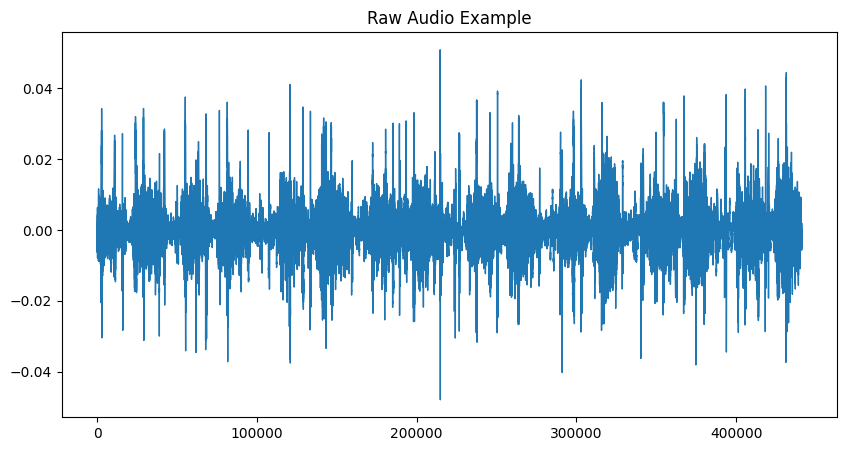

In [146]:
#Surowy przebieg pliku
pd.Series(wave).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Example')
plt.show()


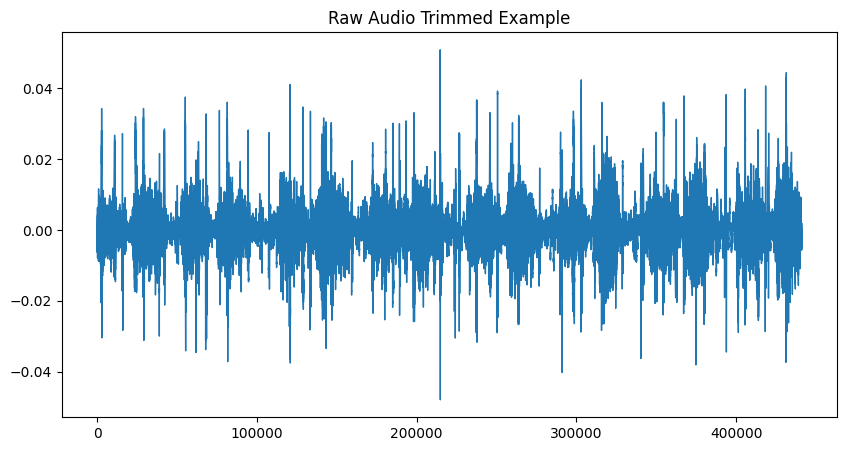

In [147]:
# Korekta ciszy dźwięku w audio
wave_trimmed, _ = librosa.effects.trim(wave, top_db=40)
pd.Series(wave_trimmed).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Trimmed Example')
plt.show()

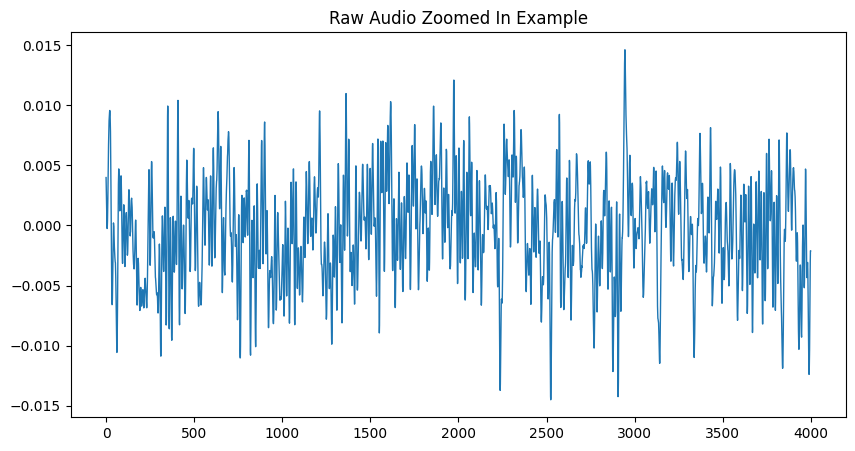

In [148]:
# Przybliżony przebieg dźwięku
pd.Series(wave[30000:34000]).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Zoomed In Example')
plt.show()

In [149]:
# Tranformata Fouriera
D = librosa.stft(wave)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape


(1025, 862)

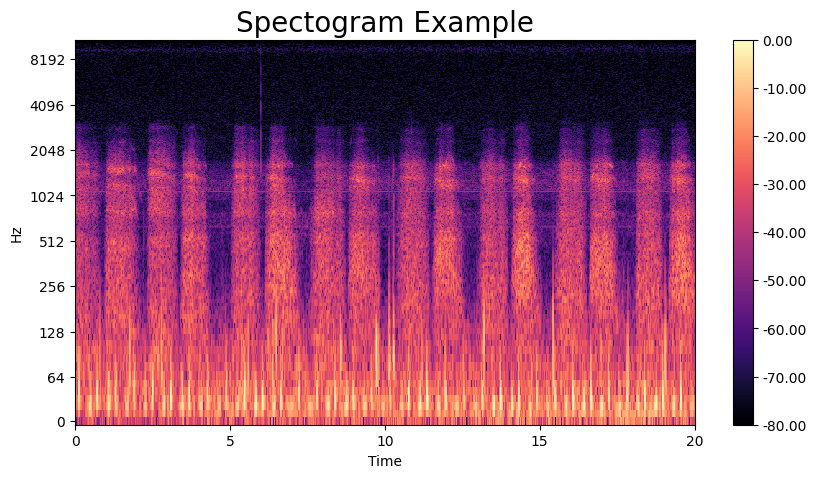

In [150]:
# Spektogram z dźwięku
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()


In [152]:
# Tworzenie spektogramu mel
mel_spec = librosa.feature.melspectrogram(y=wave,
                                   sr=sr,
                                   n_mels=128 * 2,)
S_db_mel = librosa.amplitude_to_db(mel_spec, ref=np.max)

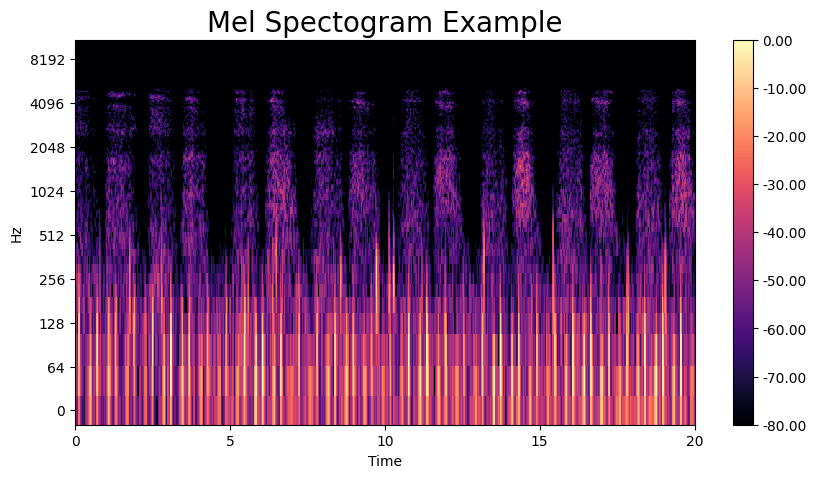

In [153]:
fig, ax = plt.subplots(figsize=(10, 5))
# Spektogram mel
img = librosa.display.specshow(S_db_mel,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Mel Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

# Tworzenie dataset'u

In [163]:
def get_spectogram(filepath,image_shape=(128,128)):
    wave, rate = librosa.load(path = filepath, sr = None)
    mel_spectogram = librosa.feature.melspectrogram(y = wave,
                                                    sr = rate)
    
    mel_spectogram = librosa.amplitude_to_db(mel_spectogram, ref = np.max)

    return np.array(mel_spectogram)


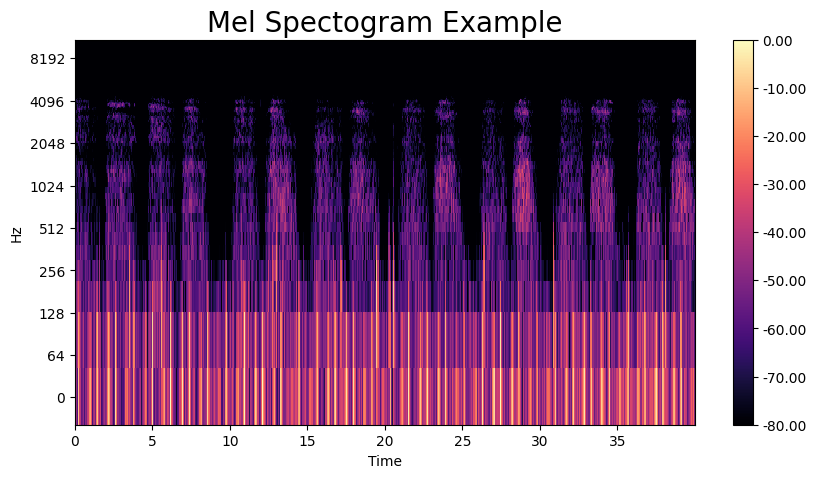

In [164]:
test = get_spectogram('./data/audio/Bronchiectasis/111_1b2_Tc_sc_Meditron.wav')

fig, ax = plt.subplots(figsize=(10, 5))
# Spektogram mel
img = librosa.display.specshow(test,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Mel Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()